In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [29]:
evt_num = 10054
input_dir = f"/home/nikin105/mlProject/data/machineLearning/mum5mup5/evaluation/mum5mup5/layerwise_v2/{evt_num}"
input_dir2 = f"/home/nikin105/mlProject/data/machineLearning/mum5mup5/classification/layerwise_v2/test/{evt_num}"
data = torch.load(input_dir,map_location=torch.device('cpu'))
data2 = torch.load(input_dir2,map_location=torch.device('cpu'))

mydata = {
    "hid" : data2.hid.detach().numpy(),
    "x" : data2.x.detach().numpy()[:,0],
    "y" : data2.x.detach().numpy()[:,1]
}

df = pd.DataFrame(mydata)

new_data = pd.concat([data,df],axis=1).drop(columns=['hid'])
new_data

,hit_id,track_id,x,y
0,0,0,0.166267,0.656997
1,1,0,0.175228,0.648309
2,2,0,0.176100,0.630073
3,3,0,0.185411,0.623183
4,4,0,0.194802,0.616954
...,...,...,...,...
163,163,13,0.359083,0.405577
164,164,13,0.368754,0.408126
165,165,13,0.378447,0.410544
166,166,13,0.385788,0.404765


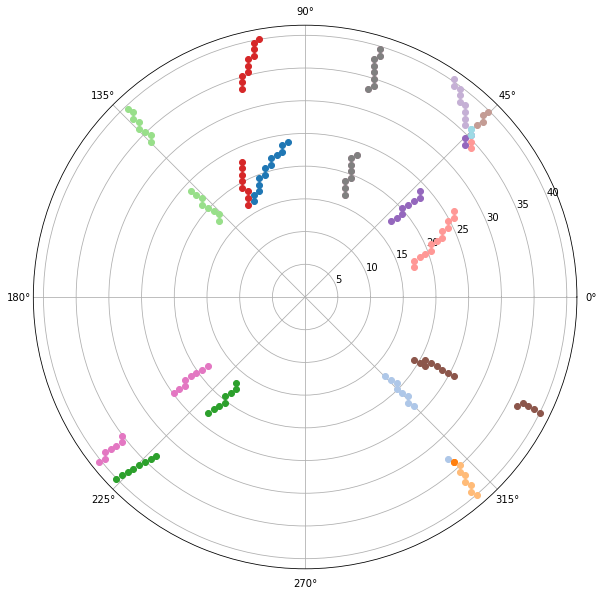

In [32]:
plt.close("all")
colors = sns.color_palette("tab20")
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(10, 10))

for i in new_data["track_id"].unique():
    r = new_data[new_data["track_id"] == i]["x"] * 100
    phi = new_data[new_data["track_id"] == i]["y"] * np.pi
    ax.plot(phi, r, marker="o", linestyle="", color=colors[i])
plt.plot(phi, r, marker="o", linestyle="", color="gray")
plt.savefig("test3.pdf", dpi=300)